# Importing required Libraries 

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import scipy.stats as st
import plotly.graph_objects as go


# Dataset loading

In [23]:
data = pd.read_csv("D://PERSONAL DATA//DATA SCIENCE//INSAID//DATA SCIENCE PROJECTS//Term 3 Project//SIMPLE LINEAR REGRESSION ON SALARY DATASET//Salary_dataset.csv")
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [30]:
data.

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [35]:
data.reset_index(drop=True,inplace=True)

# Removed Extra Column

In [60]:
data.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [62]:
data=data.drop('Unnamed: 0', axis=1)

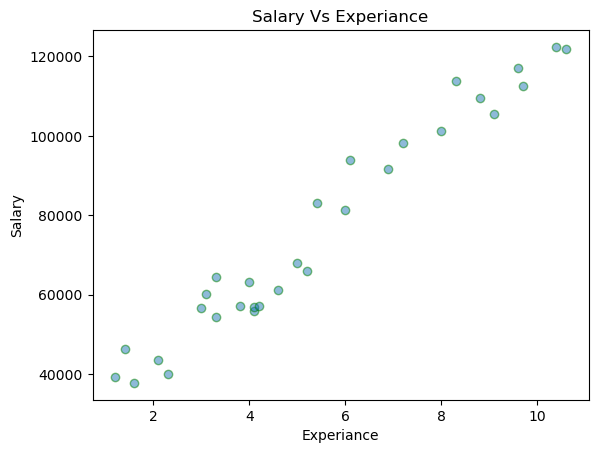

In [150]:
plt.scatter(data=data, x='YearsExperience', y='Salary',
           edgecolor="Green",alpha=0.5)
plt.title("Salary Vs Experiance")
plt.xlabel("Experiance")
plt.ylabel("Salary")
plt.show()

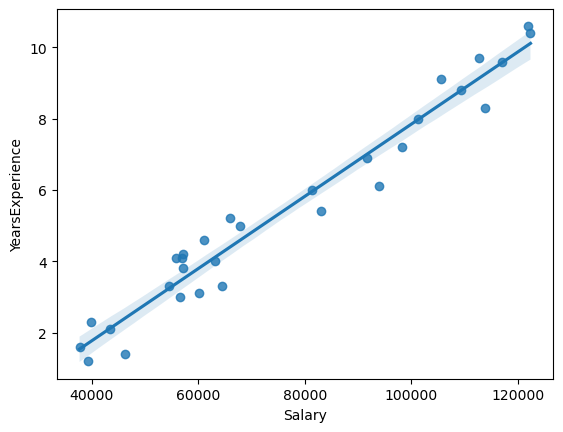

In [154]:
sns.regplot(data=data,x='Salary', y='YearsExperience',scatter=True,)
plt.show()

In [65]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

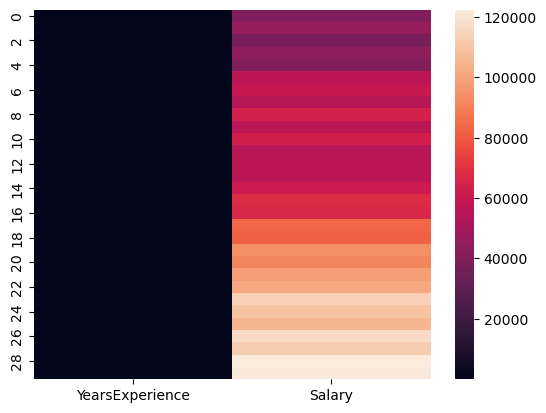

In [66]:
sns.heatmap(data)

# Spliting Train and Test data 

In [67]:
data.head()


,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [88]:
y=data['Salary']

In [89]:
x=data['YearsExperience']


Now we have both x and y data i.e independant and dependant variables 

# Pearson r Coefficient 

    In real world, there may be many features and using all of them in model development is not a good idea.

    Instead, we choose subset of features which are essentail for model building because not all features give good results.

    In this sub-part, we will show one such way (Pearson Correlation Coefficient Test) by which you can choose essential features.

    Here's how it works:
        H0: Feature X and Feature y is not correlated.
        HA: Feature X and Feature y is correlated.

(You can set threshold based on your experience in the domain)

    If coef. > 0.75 and p-value <= 0.05: Feature X and Feature y is strongly correlated.
    If coef. > 0.65 and p-value <= 0.05: Feature X and Feature y is moderately correlated.
    If coef. close to 0 and p-value <= 0.05: Feature X and Feature y is not correlated.


In [149]:
prresult , pvalues=st.pearsonr(data['YearsExperience'],data['Salary'])
print(f"PersonR Result Statistics {prresult:.2f} and pvalues : {pvalues}")

PersonR Result Statistics 0.98 and pvalues : 1.143068109227237e-20


# Create test and train dataset using sklearn model 

In [101]:
x_train, x_test, y_train ,y_test =train_test_split(x,y)
print(f"Shape of Train and Test Data\n x_train:{x_train.shape}\t x_test:{x_test.shape}\n y_train:{y_train.shape}\t y_test:{y_test.shape}")

Shape of Train and Test Data
 x_train:(22,)	 x_test:(8,)
 y_train:(22,)	 y_test:(8,)


# Reshape the data if its in 1d Make it 2 d using reshape()

In [108]:
x_train = np.array(x_train).reshape(-1, 1)  # Reshape to a 2D array
y_train = np.array(y_train) 
print(x_train.shape, y_train.shape)

(22, 1) (22,)


In [109]:
x_test =np.array(x_test).reshape(-1,1)

# Create Linear Regression and fit the model with dataset 

In [110]:

model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Predict the model with x_test dataset  

In [112]:
predict = model.predict(x_test)
predict

array([ 75061.35201641,  61396.33334075,  52611.67847782, 108247.82594303,
        54563.82400291, 125817.13566888,  34066.29598942,  62372.40610329])

# Mean Squared Error 

In [119]:
rms=mean_squared_error(predict,y_test)
print(f"RMS \t {rms}")

RMS 	 37049055.59973602


# Find the accurecy of model using r2_score

In [174]:
trainaccurecy=model.score(x_train, y_train)
testaccurecy=model.score(x_test, y_test)
mae=metrics.mean_absolute_error(y_test,predict)
mse=metrics.mean_squared_error(y_test,predict)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predict))
rmspe=np.sqrt(metrics.mean_squared_error(y_test,predict))/100
print(f"Model Accurecy : {round(accurecy*100)} %")
print(f"Coefficient  {model.coef_} and intercept{model.intercept_} ")
print(f"R2 Square on Train {trainaccurecy}")
print(f"R2 Square on Train {testaccurecy}")
print(f"Mean Absolute error {mae}")
print(f"Mean Squared error {mse}")
print(f"Root Mean Squared error {rmse}")
print(f"Root Mean Squared error {rmspe} %")



Model Accurecy : 96 %
Coefficient  [9760.72762547] and intercept22353.422838845632 
R2 Square on Train 0.9579384976066765
R2 Square on Train 0.9462602683248001
Mean Absolute error 5386.529000230691
Mean Squared error 37049055.59973602
Root Mean Squared error 6086.793540094491
Root Mean Squared error 60.86793540094491 %


In [192]:
fig = go.Figure()
fig.add_trace(trace=go.Scatter(x=x_train ,y=y_train , name='Train', mode='markers'))
fig.add_trace(trace=go.Scatter(x=x_test ,y=y_test, name='Test' ,mode='markers'))
fig.add_trace(trace=go.Scatter(x=x_train ,y=predict ,name='Train_predict'))
fig.update_layout(title_text='Regression fit of Length1 w.r.t. Weight (in gm)',
                  title_x=0.5,
                  showlegend=True,
                  xaxis_title="Salary",
                  yaxis_title="YearsExperiance",)

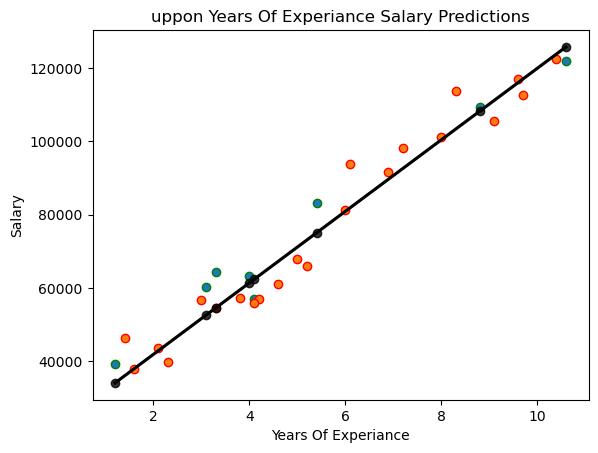

In [217]:
plt.scatter(x=x_test ,y=y_test, edgecolors='Green'  )
plt.scatter(x=x_train ,y=y_train,edgecolors='Red')
sns.regplot(x=x_test , y=predict, color='black' )
plt.title("uppon Years Of Experiance Salary Predictions")
plt.xlabel("Years Of Experiance")
plt.ylabel("Salary")
plt.show()


In [223]:
x_train.reshape(-1)

array([ 2.3,  6.1,  8. ,  5. ,  3. ,  4.2,  7.2,  6.9,  3.3,  9.1,  1.6,
        3.8, 10.4,  6. ,  4.1,  4.6,  2.1,  8.3,  9.6,  9.7,  1.4,  5.2])

In [225]:
predict

array([ 75061.35201641,  61396.33334075,  52611.67847782, 108247.82594303,
        54563.82400291, 125817.13566888,  34066.29598942,  62372.40610329])

In [230]:
y_test = np.array(y_test).reshape(-1)
predict = np.array(predict).reshape(-1)
predicts = pd.DataFrame(data = np.array([y_test, predict, abs(y_test - predict)]).T, 
                       columns = ["Expected y", "Predicted y", "Error"])
predicts

,Expected y,Predicted y,Error
0,83089.0,75061.352016,8027.647984
1,63219.0,61396.333341,1822.666659
2,60151.0,52611.678478,7539.321522
3,109432.0,108247.825943,1184.174057
4,64446.0,54563.824003,9882.175997
5,121873.0,125817.135669,3944.135669
6,39344.0,34066.295989,5277.704011
7,56958.0,62372.406103,5414.406103
